<a href="https://colab.research.google.com/github/sjsoumil/Projects/blob/main/Transfer_learning_with_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys,os
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel,preprocess_input

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

File ‘Food-5K.zip’ already there; not retrieving.



In [ ]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [ ]:
!ls Food-5K

evaluation  training  validation


In [ ]:
!ls Food-5K

ls: cannot access 'training': No such file or directory
Food-5K:
evaluation  training  validation


In [ ]:
!ls Food-5K/training


0_0.jpg     0_1338.jpg	0_325.jpg  0_663.jpg  1_0.jpg	  1_1338.jpg  1_325.jpg  1_663.jpg
0_1000.jpg  0_1339.jpg	0_326.jpg  0_664.jpg  1_1000.jpg  1_1339.jpg  1_326.jpg  1_664.jpg
0_1001.jpg  0_133.jpg	0_327.jpg  0_665.jpg  1_1001.jpg  1_133.jpg   1_327.jpg  1_665.jpg
0_1002.jpg  0_1340.jpg	0_328.jpg  0_666.jpg  1_1002.jpg  1_1340.jpg  1_328.jpg  1_666.jpg
0_1003.jpg  0_1341.jpg	0_329.jpg  0_667.jpg  1_1003.jpg  1_1341.jpg  1_329.jpg  1_667.jpg
0_1004.jpg  0_1342.jpg	0_32.jpg   0_668.jpg  1_1004.jpg  1_1342.jpg  1_32.jpg	 1_668.jpg
0_1005.jpg  0_1343.jpg	0_330.jpg  0_669.jpg  1_1005.jpg  1_1343.jpg  1_330.jpg  1_669.jpg
0_1006.jpg  0_1344.jpg	0_331.jpg  0_66.jpg   1_1006.jpg  1_1344.jpg  1_331.jpg  1_66.jpg
0_1007.jpg  0_1345.jpg	0_332.jpg  0_670.jpg  1_1007.jpg  1_1345.jpg  1_332.jpg  1_670.jpg
0_1008.jpg  0_1346.jpg	0_333.jpg  0_671.jpg  1_1008.jpg  1_1346.jpg  1_333.jpg  1_671.jpg
0_1009.jpg  0_1347.jpg	0_334.jpg  0_672.jpg  1_1009.jpg  1_1347.jpg  1_334.jpg  1_672.jpg
0_100.jpg   0_1

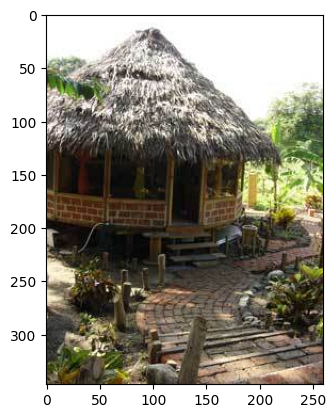

In [ ]:
plt.imshow(image.load_img("Food-5K/training/0_1379.jpg"))
plt.show()

In [ ]:
!mkdir data

In [ ]:
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food

In [ ]:
!mv Food-5K/training/0*.jpg data/train/nonfood
!mv Food-5K/training/1*.jpg data/train/food
!mv Food-5K/validation/0*.jpg data/test/nonfood
!mv Food-5K/validation/1*.jpg data/test/food

In [ ]:
train_path="data/train"
valid_path="data/test"

In [ ]:
IMAGE_SIZE=[200,200]

In [ ]:
image_files=glob(train_path+"/*/*.jpg")
valid_image=glob(valid_path+"/*/*.jpg")

In [ ]:
folders=glob(train_path+"/*")
folders

['data/train/nonfood', 'data/train/food']

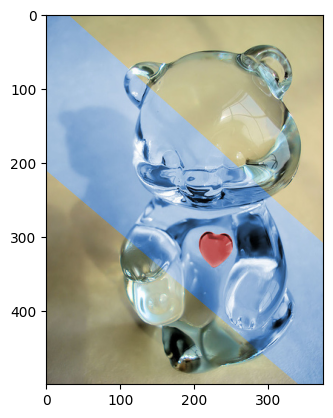

In [ ]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [ ]:
ptm=PretrainedModel(
    input_shape=IMAGE_SIZE +[3],
    weights="imagenet",
    include_top=False
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
ptm.trainable=False

In [ ]:
K=len(folders)
x=Flatten()(ptm.output)
x=Dense(K,activation="softmax")(x)

In [ ]:
model=Model(inputs=ptm.inputs,outputs=x)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
gen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input

)

In [ ]:
batch_size=128
train_generator=gen.flow_from_directory(
    train_path,shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,

)

valid_generator=gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
r=model.fit_generator(
    train_generator,
    validation_data=valid_generator,
    epochs=10,steps_per_epoch=int(np.ceil(len(image_files)/batch_size)),
    validation_steps=int(np.ceil(len(valid_image)/batch_size))
)

<ipython-input-39-c62cb6d1bea1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/10
24/24 [==============================] - 86s 3s/step - loss: 2.2629 - accuracy: 0.9093 - val_loss: 0.5601 - val_accuracy: 0.9730
Epoch 2/10
24/24 [==============================] - 51s 2s/step - loss: 0.5857 - accuracy: 0.9750 - val_loss: 0.5821 - val_accuracy: 0.9790
Epoch 3/10
24/24 [==============================] - 60s 2s/step - loss: 0.4008 - accuracy: 0.9783 - val_loss: 0.9136 - val_accuracy: 0.9630
Epoch 4/10
24/24 [==============================] - 51s 2s/step - loss: 0.2446 - accuracy: 0.9863 - val_loss: 0.8374 - val_accuracy: 0.9650
Epoch 5/10
24/24 [==============================] - 60s 3s/step - loss: 0.1435 - accuracy: 0.9913 - val_loss: 0.6900 - val_accuracy: 0.9750
Epoch 6/10
24/24 [==============================] - 51s 2s/step - loss: 0.1365 - accuracy: 0.9907 - val_loss: 0.8777 - val_accuracy: 0.9660
Epoch 7/10
24/24 [==============================] - 51s 2s/step - loss: 0.1444 - accuracy: 0.9903 - val_loss: 0.7300 - val_accuracy: 0.9700
Epoch 8/10
24/24 [==

In [ ]:
""